In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# save charts
charts_dir = "charts"
os.makedirs(charts_dir, exist_ok=True)

In [14]:
# Read Data
severeinjury = pd.read_csv("severeinjury.csv",encoding="latin1")
Event = pd.read_csv("Event.csv",encoding="latin1")
Nature = pd.read_csv("Nature.csv",encoding="latin1")
Part = pd.read_csv("Part.csv",encoding="latin1")
Source = pd.read_csv("Source.csv",encoding="latin1")

In [21]:
# ========================================
# 📌 Merge All Data
# ========================================
df = (severeinjury
      .merge(Event[['CASE_CODE','CASE_CODE_TITLE']], left_on='Event', right_on='CASE_CODE', how='left')
      .rename(columns={'CASE_CODE_TITLE':'EventTitleFull'}).drop(columns=['CASE_CODE'])
      .merge(Nature[['CASE_CODE','CASE_CODE_TITLE']], left_on='Nature', right_on='CASE_CODE', how='left')
      .rename(columns={'CASE_CODE_TITLE':'NatureTitleFull'}).drop(columns=['CASE_CODE'])
      .merge(Part[['CASE_CODE','CASE_CODE_TITLE']], left_on='Part of Body', right_on='CASE_CODE', how='left')
      .rename(columns={'CASE_CODE_TITLE':'BodyPartFull'}).drop(columns=['CASE_CODE'])
      .merge(Source[['CASE_CODE','CASE_CODE_TITLE']], left_on='Source', right_on='CASE_CODE', how='left')
      .rename(columns={'CASE_CODE_TITLE':'SourceTitleFull'}).drop(columns=['CASE_CODE'])
     )

In [22]:
# ========================================
# 📌 Helper Columns
# ========================================

df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')

df['IsHospitalized'] = df['Hospitalized'].notna() & (df['Hospitalized'] != '00:00:00')
df['IsAmputation']   = df['Amputation'].fillna(0).astype(int) > 0

In [23]:
# ========================================
# 📌 16 Advanced Analyses (Queries)
# ========================================

In [25]:

# 1. Total hospitalized and amputations
q1 = {
    "HospitalizedCount": df['IsHospitalized'].sum(),
    "Amputations": df['IsAmputation'].sum()
}

# 2. Top 10 employers by severe injuries
q2 = df[df['IsHospitalized'] | df['IsAmputation']].groupby('Employer').size().nlargest(10)

# 3. Body parts most injured in hospitalized cases
q3 = df[df['IsHospitalized']].groupby('BodyPartFull').size().sort_values(ascending=False)

# 4. Distribution by severity
q4 = df.assign(
    Severity=df.apply(
        lambda x: 'Hospitalized' if x['IsHospitalized'] else ('Amputation' if x['IsAmputation'] else 'Non-severe'),
        axis=1
    )
).groupby('Severity').size()

# 5. Injuries over time (yearly trend)
q5 = df.groupby(df['EventDate'].dt.year).size()

# 6. Monthly trend
q6 = df.groupby(df['EventDate'].dt.to_period('M')).size()

# 7. Injuries by state
q7 = df.groupby('State').size().sort_values(ascending=False)

# 8. Injuries by city
q8 = df.groupby('City').size().sort_values(ascending=False).head(20)

# 9. Injuries by NAICS sector
q9 = df.groupby('Primary NAICS').size().sort_values(ascending=False).head(15)

# 10. Injuries by Event type
q10 = df.groupby('EventTitleFull').size().sort_values(ascending=False).head(15)

# 11. Top employers with hospitalized or amputations
q11 = q2  # نفس q2

# 12. Injuries by Nature type
q12 = df.groupby('NatureTitleFull').size().sort_values(ascending=False).head(15)

# 13. Body parts most hospitalized (same q3)
q13 = q3

# 14. Injuries by Source
q14 = df.groupby('SourceTitleFull').size().sort_values(ascending=False).head(15)

# 15. Severity distribution (same q4)
q15 = q4

# 16. Injuries by latitude/longitude (for maps later)
q16 = df[['Latitude','Longitude']].dropna()

In [26]:
# ========================================
# 📌 Charts 
# ========================================

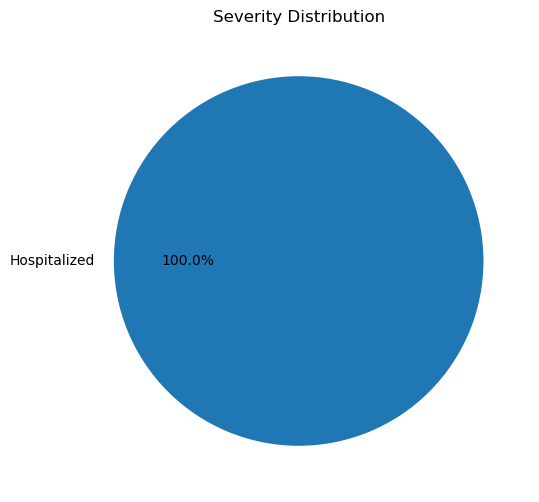

In [27]:
# 1. Severity distribution pie chart
plt.figure(figsize=(6,6))
q4.plot.pie(autopct='%1.1f%%')
plt.title("Severity Distribution")
plt.ylabel("")
plt.savefig("charts/severity_distribution.png")
plt.show()

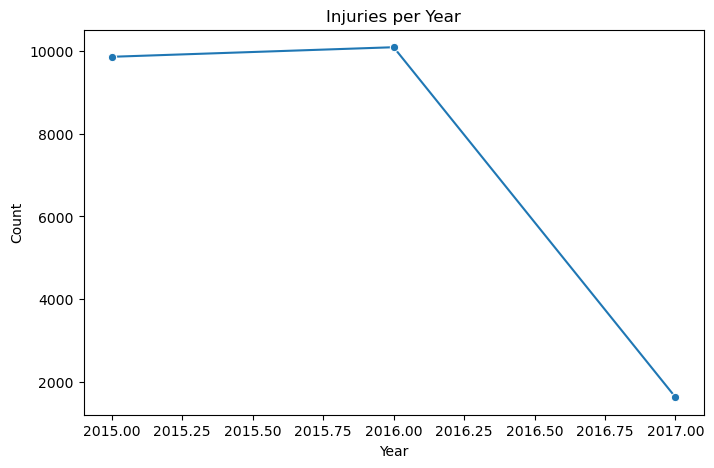

In [28]:
# 2. Injuries over years
plt.figure(figsize=(8,5))
sns.lineplot(x=q5.index, y=q5.values, marker="o")
plt.title("Injuries per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.savefig("charts/injuries_per_year.png")
plt.show()

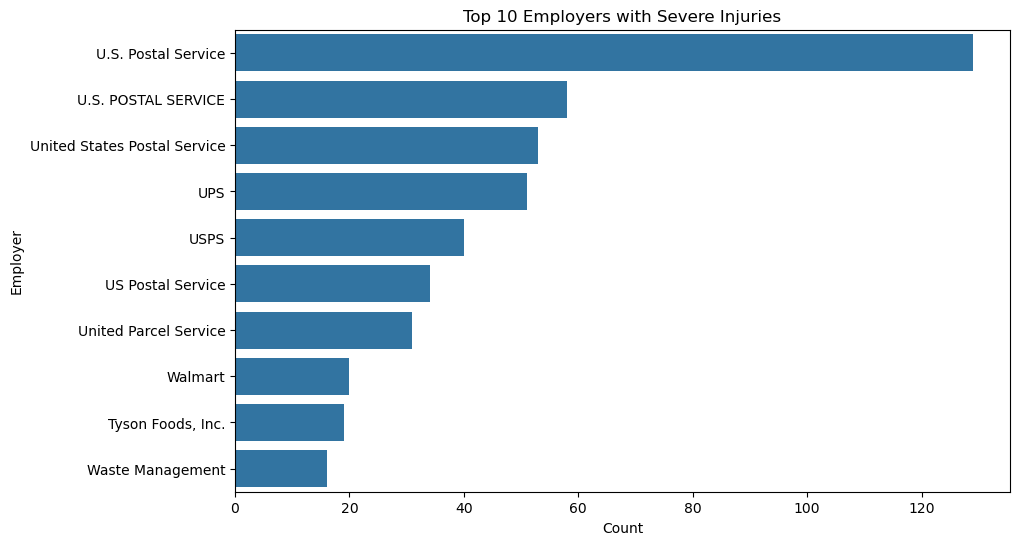

In [29]:
# 3. Top 10 Employers
plt.figure(figsize=(10,6))
sns.barplot(x=q2.values, y=q2.index)
plt.title("Top 10 Employers with Severe Injuries")
plt.xlabel("Count")
plt.ylabel("Employer")
plt.savefig("charts/top_employers.png")
plt.show()

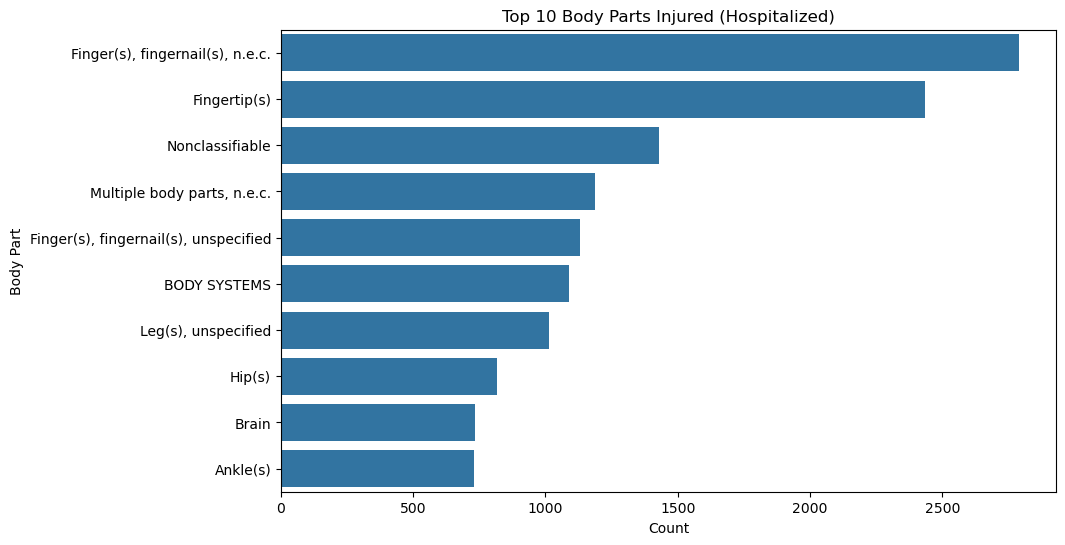

In [30]:
# 4. Top Body Parts
plt.figure(figsize=(10,6))
sns.barplot(x=q3.values[:10], y=q3.index[:10])
plt.title("Top 10 Body Parts Injured (Hospitalized)")
plt.xlabel("Count")
plt.ylabel("Body Part")
plt.savefig("charts/top_bodyparts.png")
plt.show()

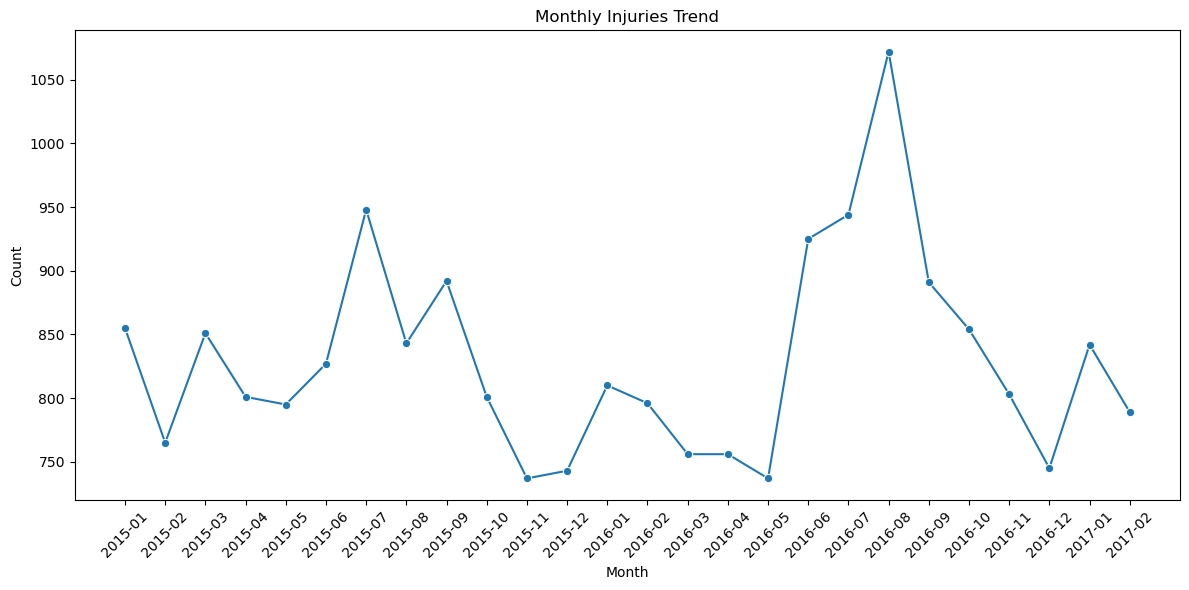

In [31]:
# 5. Monthly trend
plt.figure(figsize=(12,6))
q6.index = q6.index.astype(str)
sns.lineplot(x=q6.index, y=q6.values, marker="o")
plt.title("Monthly Injuries Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/monthly_trend.png")
plt.show()

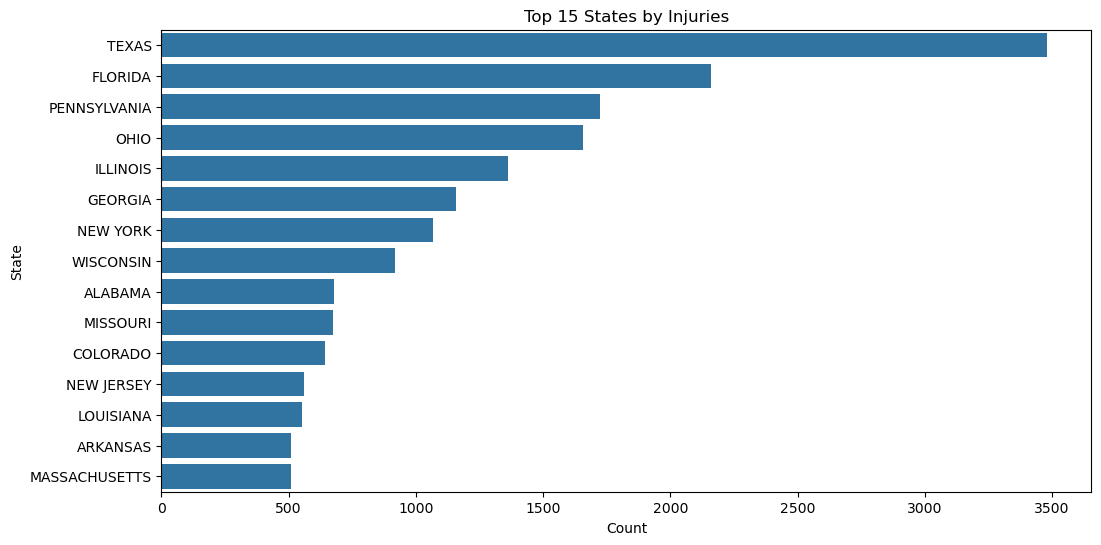

In [32]:
# 6. Top States
plt.figure(figsize=(12,6))
sns.barplot(x=q7.values[:15], y=q7.index[:15])
plt.title("Top 15 States by Injuries")
plt.xlabel("Count")
plt.ylabel("State")
plt.savefig("charts/top_states.png")
plt.show()

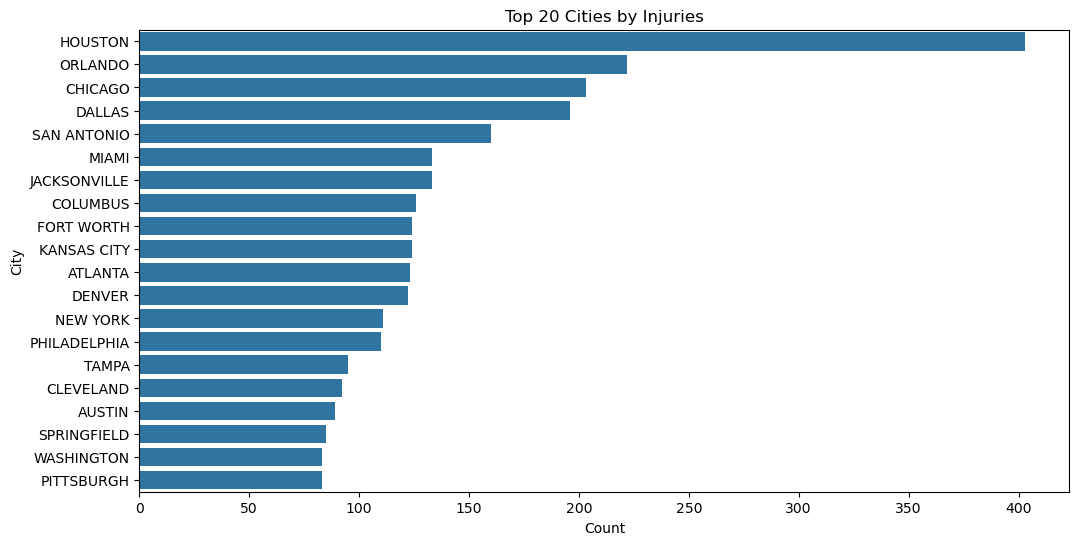

In [33]:
# 7. Top Cities
plt.figure(figsize=(12,6))
sns.barplot(x=q8.values, y=q8.index)
plt.title("Top 20 Cities by Injuries")
plt.xlabel("Count")
plt.ylabel("City")
plt.savefig("charts/top_cities.png")
plt.show()

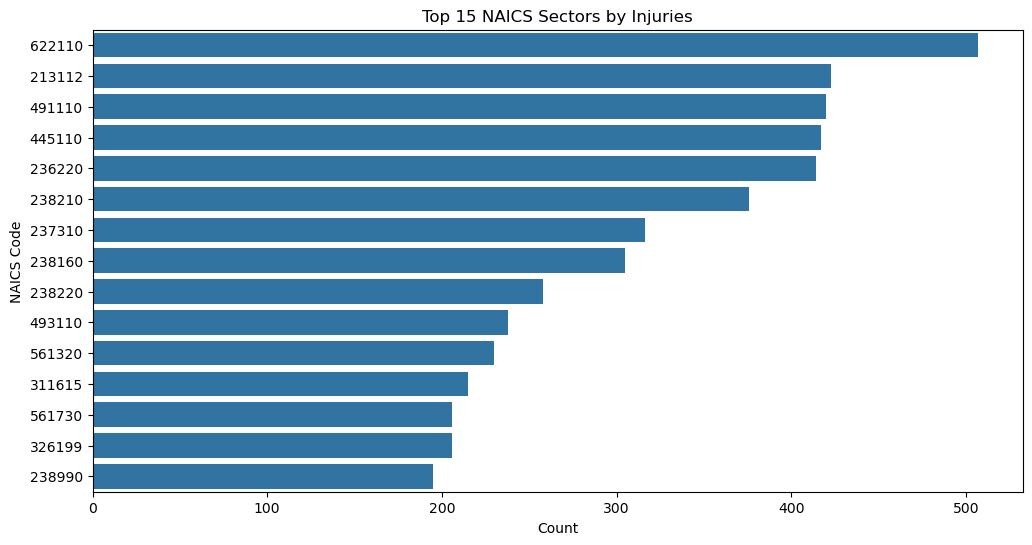

In [34]:
# 8. Top NAICS sectors
plt.figure(figsize=(12,6))
sns.barplot(x=q9.values, y=q9.index)
plt.title("Top 15 NAICS Sectors by Injuries")
plt.xlabel("Count")
plt.ylabel("NAICS Code")
plt.savefig("charts/top_naics.png")
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_13400\3225374708.py:7: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.savefig("charts/top_event.png")
C:\Users\Ismail\AppData\Local\Temp\ipykernel_13400\3225374708.py:7: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.savefig("charts/top_event.png")
C:\Users\Ismail\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ismail\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


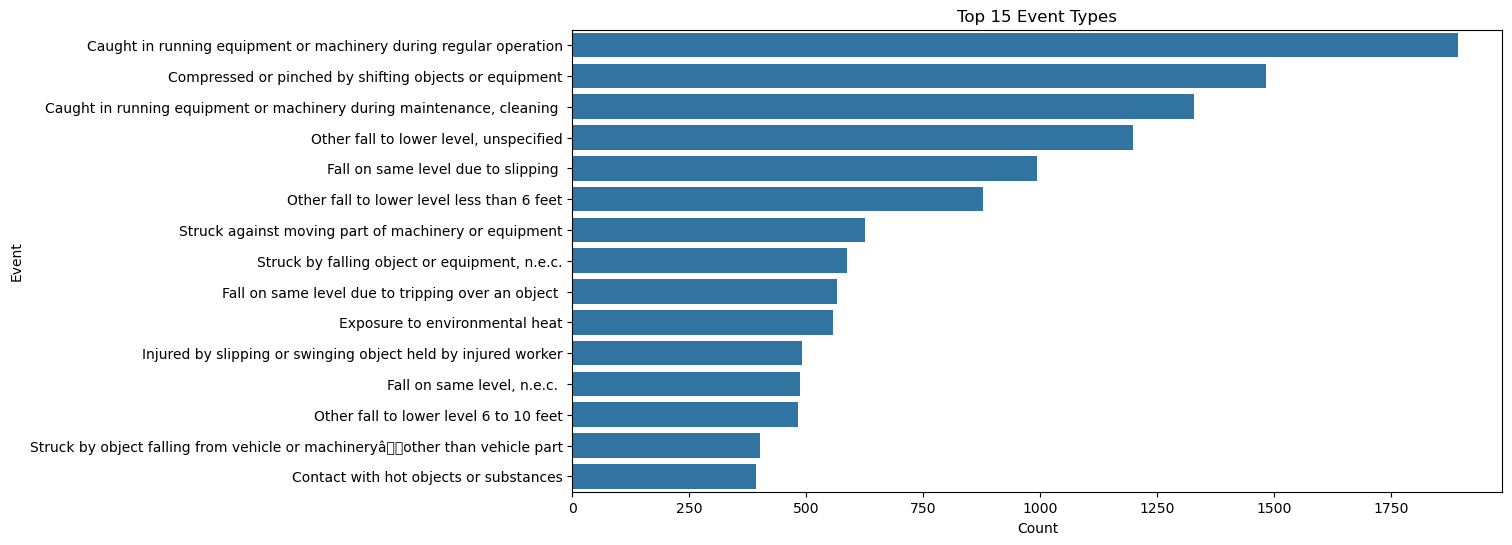

In [35]:
# 9. Top Event Types
plt.figure(figsize=(12,6))
sns.barplot(x=q10.values, y=q10.index)
plt.title("Top 15 Event Types")
plt.xlabel("Count")
plt.ylabel("Event")
plt.savefig("charts/top_event.png")
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_13400\1002939375.py:7: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.savefig("charts/top_nature.png")
C:\Users\Ismail\AppData\Local\Temp\ipykernel_13400\1002939375.py:7: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.savefig("charts/top_nature.png")
C:\Users\Ismail\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ismail\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


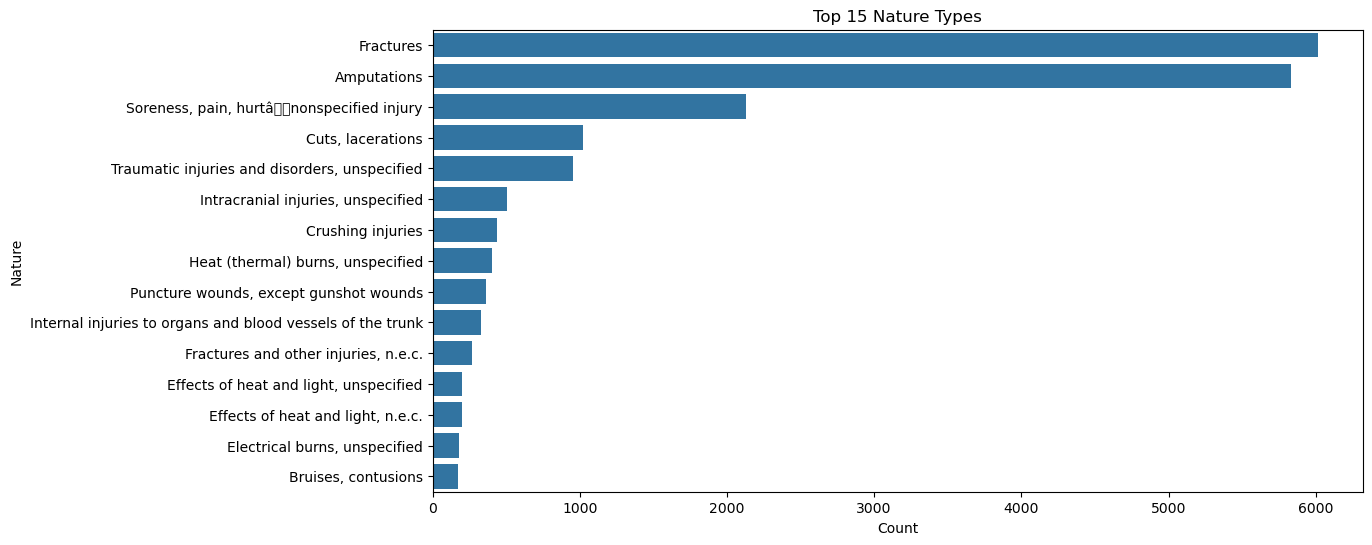

In [36]:
# 10. Top Nature Types
plt.figure(figsize=(12,6))
sns.barplot(x=q12.values, y=q12.index)
plt.title("Top 15 Nature Types")
plt.xlabel("Count")
plt.ylabel("Nature")
plt.savefig("charts/top_nature.png")
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_13400\119189861.py:7: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.savefig("charts/top_sources.png")
C:\Users\Ismail\AppData\Local\Temp\ipykernel_13400\119189861.py:7: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.savefig("charts/top_sources.png")
C:\Users\Ismail\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ismail\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


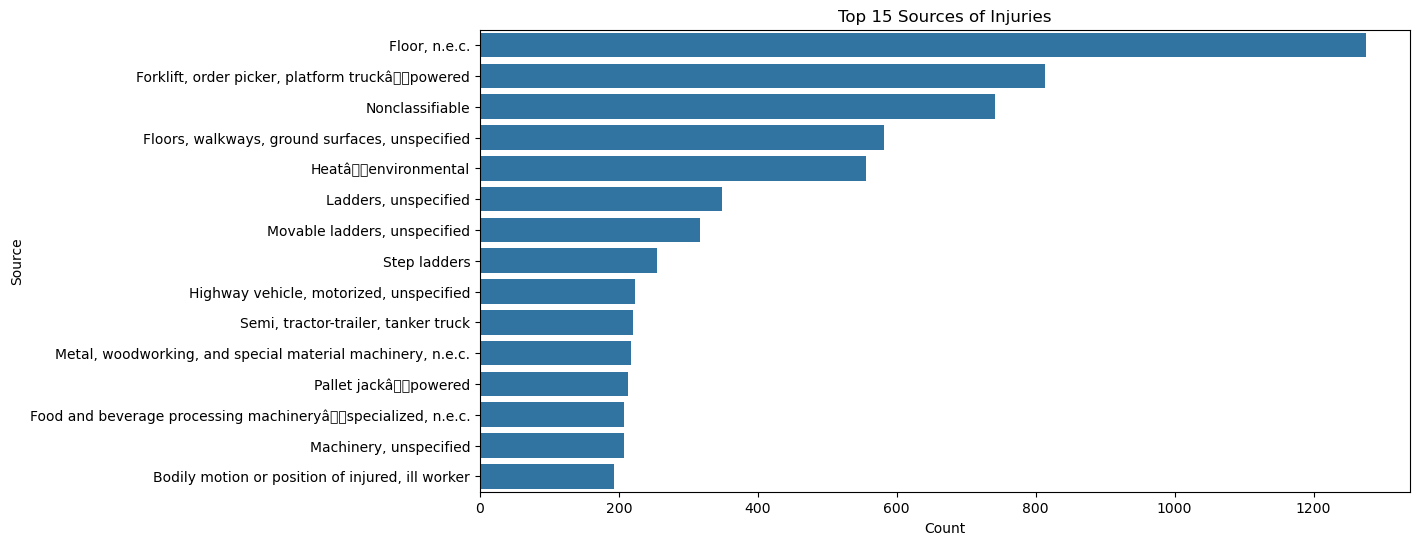

In [37]:
# 11. Top Sources
plt.figure(figsize=(12,6))
sns.barplot(x=q14.values, y=q14.index)
plt.title("Top 15 Sources of Injuries")
plt.xlabel("Count")
plt.ylabel("Source")
plt.savefig("charts/top_sources.png")
plt.show()